In [2]:
!pip install -q -U \
  tensorflow==2.0.0 \
  apache-beam

In [3]:
from datetime import datetime
import os
import pprint
import tempfile
import urllib
pp = pprint.PrettyPrinter()

import tensorflow as tf

import apache_beam as beam
from apache_beam import pvalue
from apache_beam.runners.interactive.display import pipeline_graph
import graphviz

In [4]:
print('TensorFlow version: {}'.format(tf.__version__))
print('Beam version: {}'.format(beam.__version__))

TensorFlow version: 2.0.0
Beam version: 2.41.0


In [5]:
pip install apache-beam[interactive]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
first_pipeline = beam.Pipeline()

lines = (first_pipeline
         | "Create" >> beam.Create(["Hello", "World", "!!!"]) # PCollection
         | "Print" >> beam.ParDo(print)) # ParDo transform

result = first_pipeline.run()
result.state

Hello
World
!!!


'DONE'

/usr/bin/dot


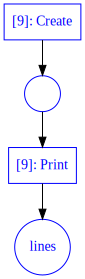

In [10]:
def display_pipeline(pipeline):
  graph = pipeline_graph.PipelineGraph(pipeline)
  return graphviz.Source(graph.get_dot())

display_pipeline(first_pipeline)

10
20
30
40
50
60
70
80
90
100
/usr/bin/dot


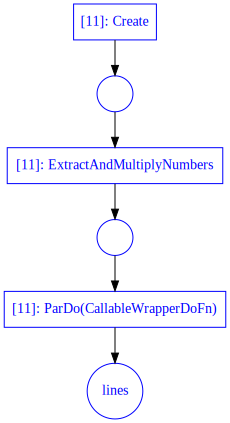

In [11]:
class ExtractAndMultiplyNumbers(beam.PTransform):
    def expand(self, pcollection):
        return (pcollection
            | beam.FlatMap(lambda line: line.split(","))
            | beam.Map(lambda num: int(num) * 10))

with beam.Pipeline() as composite_pipeline:
  lines = (composite_pipeline
           | beam.Create(['1,2,3,4,5', '6,7,8,9,10'])
           | ExtractAndMultiplyNumbers()
           | beam.ParDo(print))

display_pipeline(composite_pipeline)

In [21]:
import apache_beam as beam

class CustomTransform(beam.PTransform):
  
  def expand(self, input_coll):
    
    a = ( 
        input_coll
                       | 'Combine' >> beam.CombinePerKey(sum)
                       | 'count' >> beam.Filter(filter_on_count)
                       | 'output' >> beam.Map(format_output)
              
    )
    return a


In [14]:
def SplitRow(element):
    return element.split(',')

In [15]:
def filter_on_count(element):
  name, count = element
  if count > 1:
    return element

In [18]:
def format_output(element):
  name, count = element
  
  return ', '.join((name,str(count),'title'))

p = beam.Pipeline()

In [17]:
input_collection = ( 
                      p 
                      | "Read from text file" >> beam.io.ReadFromText('netflix1.txt')
                      | "Split rows" >> beam.Map(SplitRow)
                   )

In [19]:
cardio_count = (
                      input_collection
                      | 'Title' >> beam.Filter(lambda record: record[3] == 'title')
                      | 'Shows' >> beam.Map(lambda record: ("Shows, " +record[1], 1))
                      | 'Movies' >> CustomTransform()
                      | 'output' >> beam.io.WriteToText('netflix.txt')
                 )

In [20]:
p.run()